<a href="https://colab.research.google.com/github/wikibook/machine-learning/blob/2.0/jupyter_notebook/4.5_가우시안_나이브베이즈_아이리스_분류_실습.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 임포트
실습에 필요한 라이브러리를 임포트합니다.

In [3]:
# 시각화를 위해 pandas를 임포트합니다
import pandas as pd
# iris 데이터는 sklearn에서 직접 로드할 수 있습니다
from sklearn.datasets import load_iris
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있습니다
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes로 iris 데이터를 분류하도록 하겠습니다
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics와 accuracy_score를 임포트합니다
from sklearn import metrics
from sklearn.metrics import accuracy_score
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)

# iris 데이터 시각화

In [4]:
# iris 데이터를 불러옵니다
dataset = load_iris()
# pandas의 데이터프레임으로 데이터를 저장합니다
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 분류값을 데이터프레임에 저장합니다
df['target'] = dataset.target
# 숫자인 분류값을 이해를 돕기위해 문자로 변경합니다
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
# 데이터를 확인해봅니다
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

# iris 데이터의 분포도 확인
iris 데이터의 분포도를 확인해보도록 하겠습니다.
아래 챠트에서 볼 수 있듯, iris 데이터의 분포도가 정규분포(Gaussian Distribution)과 유사합니다.  

In [6]:
# 분류값 별로 데이터프레임을 나눕니다
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

## sepal length (cm)

In [7]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', 
                                    ax=ax, 
                                    secondary_y=True, 
                                    title="setosa sepal length", 
                                    figsize = (8,4))

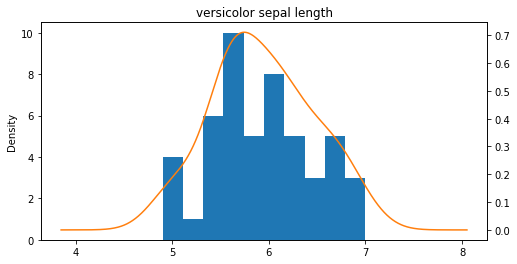

In [8]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', 
                                        ax=ax, 
                                        secondary_y=True, 
                                        title="versicolor sepal length", 
                                        figsize = (8,4))

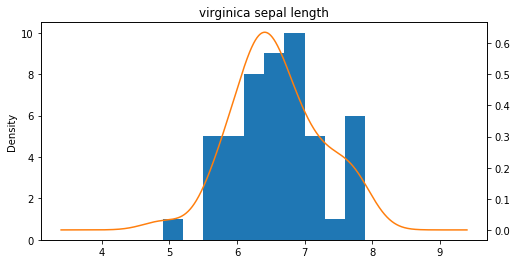

In [9]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="virginica sepal length", 
                                       figsize = (8,4))

## sepal width (cm)	

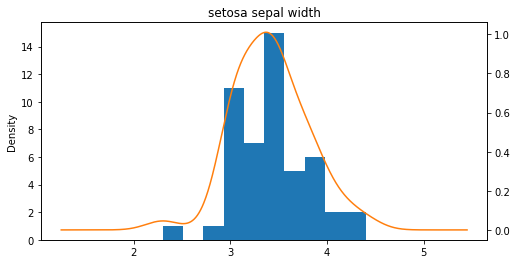

In [10]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', 
                                   ax=ax, 
                                   secondary_y=True, 
                                   title="setosa sepal width", 
                                   figsize = (8,4))

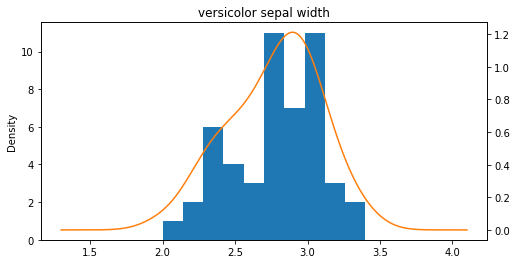

In [11]:
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')
versicolor_df['sepal width (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="versicolor sepal width", 
                                       figsize = (8,4))

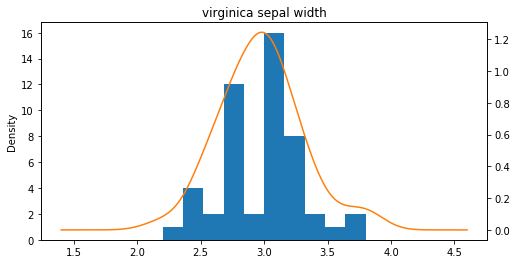

In [12]:
ax = virginica_df['sepal width (cm)'].plot(kind='hist')
virginica_df['sepal width (cm)'].plot(kind='kde', 
                                      ax=ax, 
                                      secondary_y=True, 
                                      title="virginica sepal width", 
                                      figsize = (8,4))

## petal length (cm)

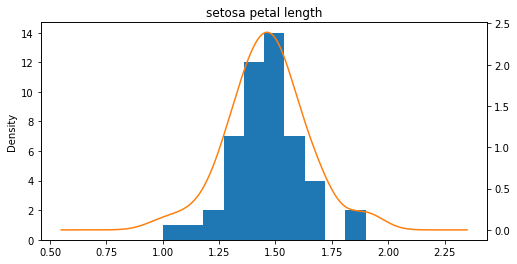

In [13]:
ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde', 
                                    ax=ax, 
                                    secondary_y=True, 
                                    title="setosa petal length", 
                                    figsize = (8,4))

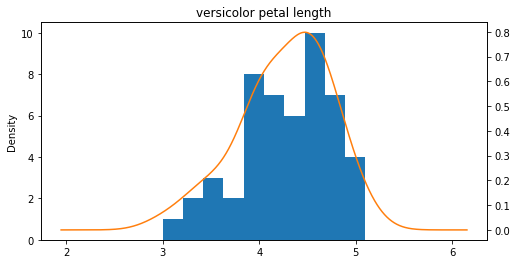

In [14]:
ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde', 
                                        ax=ax, 
                                        secondary_y=True, 
                                        title="versicolor petal length", 
                                        figsize = (8,4))

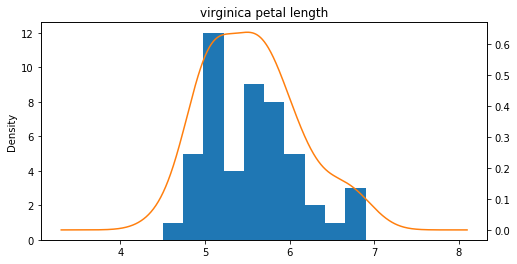

In [15]:
ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="virginica petal length", 
                                       figsize = (8,4))

## petal width (cm)

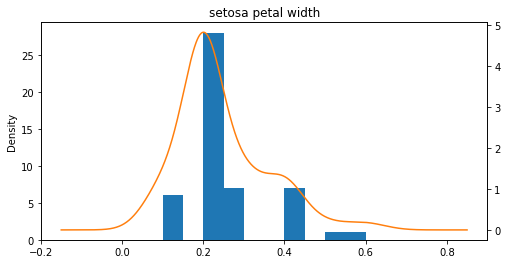

In [16]:
ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde', 
                                   ax=ax, 
                                   secondary_y=True, 
                                   title="setosa petal width", 
                                   figsize = (8,4))

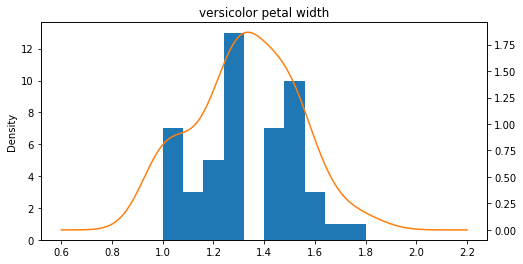

In [17]:
ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde', 
                                       ax=ax, 
                                       secondary_y=True, 
                                       title="versicolor petal width", 
                                       figsize = (8,4))

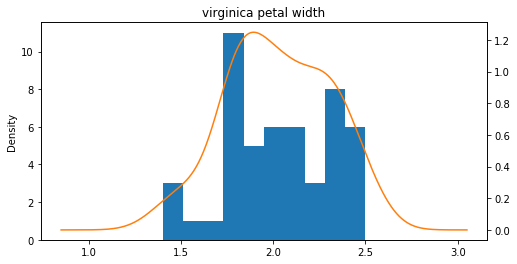

In [18]:
ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde', 
                                      ax=ax, 
                                      secondary_y=True, 
                                      title="virginica petal width", 
                                      figsize = (8,4))

# 데이터를 학습 데이터와 테스트 데이터로 나누기

In [19]:
# 20%를 테스트 데이터로 분류합니다
X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2)

# Gaussian Naive Bayes 분류하기

In [20]:
# 학습데이터로 모델을 학습합니다
model = GaussianNB()
model.fit(X_train, y_train)

# 테스트 데이터로 모델을 테스트합니다
expected = y_test
predicted = model.predict(X_test)

In [21]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.83      0.91      0.87        11
          2       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



In [22]:
accuracy_score(y_test, predicted)

0.9

# Confusion Matrix
아래 confusion matrix에서 보실 수 있듯이 1개의 데이터만 제외하고, 모든 데이터가 정확히 분류되었습니다.

In [23]:
print(metrics.confusion_matrix(expected, predicted))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]
